## Steps involved in the project
#### 1. Data Preprocessing
#### 2. Fitting Classification Algorithm to the trainning dataset.
#### 3. Predicting thr test result.
#### 4. Test accuracy of the result (accuracy score, confusion matrix)
#### 5. Visualizing the test result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.read_csv('titanic.csv'))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
data = pd.read_csv('titanic.csv', index_col = 0)

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
data.shape

(891, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


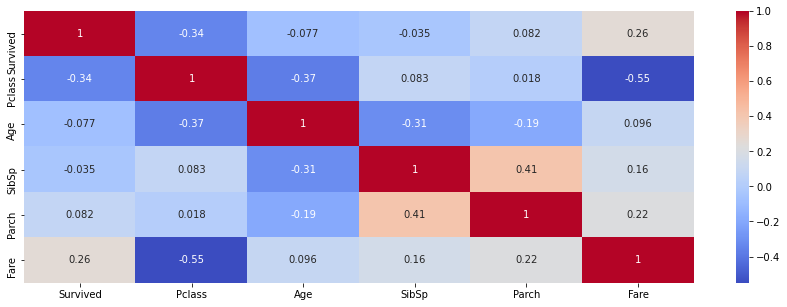

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot= True, cmap = 'coolwarm')

In [12]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data['Embarked'] = data["Embarked"].fillna('S')

In [15]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [16]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

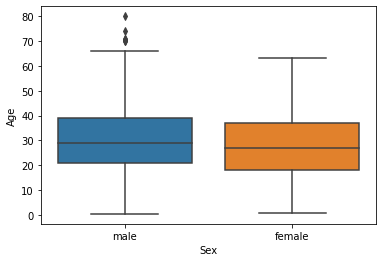

In [18]:
# checking median of age based on sex
sns.boxplot(x = 'Sex', y = 'Age', data =data)

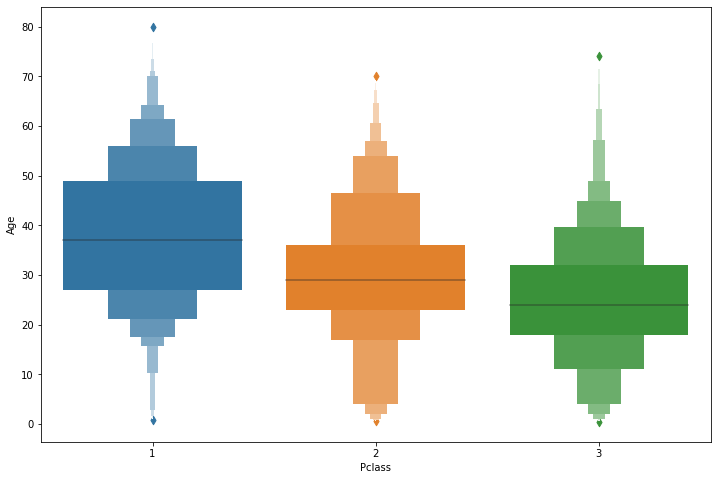

In [19]:
# checking median of age based on Pclass
plt.figure(figsize=(12,8))
sns.boxenplot(x= 'Pclass', y = 'Age', data = data)

In [20]:
def impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return  38
        elif Pclass == 2:
            return  29
        else:
            return 25
    else:
        return Age
        
    

In [21]:
data['Age'] = data[['Age', 'Pclass']].apply(impute, axis = 1)

In [22]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [23]:
data = data.drop('Cabin', axis = 1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 116.6+ KB


In [25]:
data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [27]:
data = pd.get_dummies(data = data, columns= ['Sex', 'Embarked'])

In [28]:
data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [29]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [30]:
from sklearn.preprocessing import StandardScaler
scaled  = StandardScaler()
scaled_x = scaled.fit_transform(x)

In [31]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,25.0,1,2,23.4500,1,0,0,0,1


In [32]:
sc = StandardScaler()
s_x = sc.fit_transform(x)

In [33]:
s_x

array([[ 0.82737724, -0.54925917,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.66244506,  0.43279337, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.24633311, -0.4745452 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.32206462,  0.43279337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.24633311, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.20805597, -0.4745452 , ..., -0.48204268,
         3.25137334, -1.62380254]])

In [34]:
s_x = pd.DataFrame(s_x, columns = x.columns)

In [35]:
s_x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.549259,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.662445,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.246333,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.435251,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.435251,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838


In [36]:
from sklearn.model_selection import train_test_split

s_x_train, s_x_test, y_train, y_test = train_test_split(s_x,y,test_size = 0.20)


In [37]:
s_x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
228,-0.369365,-0.852185,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
627,-1.566107,-0.624991,-0.474545,-0.473674,0.921244,1.355574,-1.355574,-0.482043,-0.307562,0.615838
243,0.827377,-0.549259,-0.474545,-0.473674,-0.504962,-0.737695,0.737695,-0.482043,-0.307562,0.615838
564,0.827377,-0.322065,-0.474545,-0.473674,-0.486337,1.355574,-1.355574,-0.482043,-0.307562,0.615838
715,0.827377,-0.776454,-0.474545,-0.473674,-0.494391,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
723,-0.369365,1.571223,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
434,-1.566107,1.571223,0.432793,-0.473674,0.477107,-0.737695,0.737695,-0.482043,-0.307562,0.615838
6,-1.566107,1.874149,-0.474545,-0.473674,0.395814,-0.737695,0.737695,-0.482043,-0.307562,0.615838
437,-0.369365,-0.397796,1.340132,3.250237,-0.270896,1.355574,-1.355574,-0.482043,-0.307562,0.615838


In [38]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()

random.fit(s_x_train, y_train)

RandomForestClassifier()

In [39]:
prediction = random.predict(s_x_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8379888268156425

In [41]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(s_x_train, y_train)

log_prediction = log_model.predict(s_x_test)

accuracy_log_model = accuracy_score(y_test, log_prediction)
print('\n the accuracy of the log model is {}'.format(accuracy_log_model))


 the accuracy of the log model is 0.8379888268156425


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(s_x_train,y_train)

knn_prediction = knn.predict(s_x_test)

accuracy_knn = accuracy_score(y_test, knn_prediction)

print('\n The Accuracy Of the KNearest Nighbor Classifies is {}'.format(accuracy_knn))


 The Accuracy Of the KNearest Nighbor Classifies is 0.8379888268156425


In [43]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(s_x_train, y_train)

tree_prediction = tree.predict(s_x_test)

accuracy_tree = accuracy_score(y_test, tree_prediction)

print('\n The Accuracy Of Decision tree Classifier is {}'.format(accuracy_tree))




 The Accuracy Of Decision tree Classifier is 0.7932960893854749


In [44]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, tree_prediction))

[[89 21]
 [16 53]]
